In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import pyfolio as pf
from extract_returns import extract_returns

In [3]:
results = pd.read_pickle('results_1a_2013-2018.pickle')
results.tail()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2018-11-14 21:00:00+00:00,0.149085,0.480582,0.080101,1.124884,0.124277,-0.016159,103181.50,1.480582e+07,-6.868865e+08,0.0,...,-6.886762e+08,0.0,14,0.776405,1.470264e+07,-6.998347e+08,0.0,1480,"[{'amount': 135, 'sid': Future(27849 [FVZ18]),...",0.0
2018-11-15 21:00:00+00:00,0.149323,0.447744,0.076637,1.147060,0.124302,-0.018593,-328384.50,1.447744e+07,-6.455216e+08,0.0,...,-6.470157e+08,0.0,13,0.735463,1.480582e+07,-6.868865e+08,0.0,1481,"[{'amount': -24, 'sid': Future(27587 [SIX18]),...",0.0
2018-11-16 21:00:00+00:00,0.149353,0.430916,0.074654,1.152644,0.124263,-0.018861,-168284.00,1.430916e+07,-6.457687e+08,0.0,...,-6.471542e+08,0.0,13,0.714775,1.447744e+07,-6.455216e+08,0.0,1482,"[{'amount': -37, 'sid': Future(27586 [NGZ18]),...",0.0
2018-11-19 21:00:00+00:00,0.149305,0.428551,0.074210,1.116233,0.124429,-0.018427,-23644.47,1.428551e+07,-6.398005e+08,0.0,...,-6.454024e+08,0.0,12,0.711731,1.430916e+07,-6.457687e+08,0.0,1483,"[{'amount': 24, 'sid': Future(27587 [SIX18]), ...",0.0
2018-11-20 21:00:00+00:00,0.149371,0.449360,0.076958,1.077070,0.124634,-0.021327,208088.50,1.449360e+07,-1.253851e+07,0.0,...,-1.633061e+07,0.0,10,0.736047,1.428551e+07,-6.398005e+08,0.0,1484,"[{'amount': -48, 'sid': Future(27587 [SIX18]),...",0.0


In [4]:
returns, positions, transactions = extract_returns(results)

In [5]:
#results.to_csv('results.csv')
#returns.to_csv('returns.csv')
#transactions.to_csv('transactions_1.csv')
#positions.to_csv('positions.csv')

In [6]:
# generate sector dictionary for every symbol
pos = list(positions.columns)
pos.remove('cash')
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [7]:
out_of_sample=results.index[-21]
transactions_mod = transactions.copy()
transactions_mod.price = transactions.sid.apply(lambda x: x.multiplier) * transactions.price
benchmark = (results['benchmark_period_return'] + 1).pct_change()[1:]
benchmark.index = benchmark.index.normalize()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.62,2015-01-29,2015-07-14,2015-08-24,148
1,18.73,2015-08-24,2017-09-28,2018-01-23,632
2,13.40,2018-01-26,2018-11-19,NaT,NaN
3,11.82,2013-03-06,2013-10-15,2014-03-18,270
4,7.75,2014-03-24,2014-08-06,2014-09-08,121


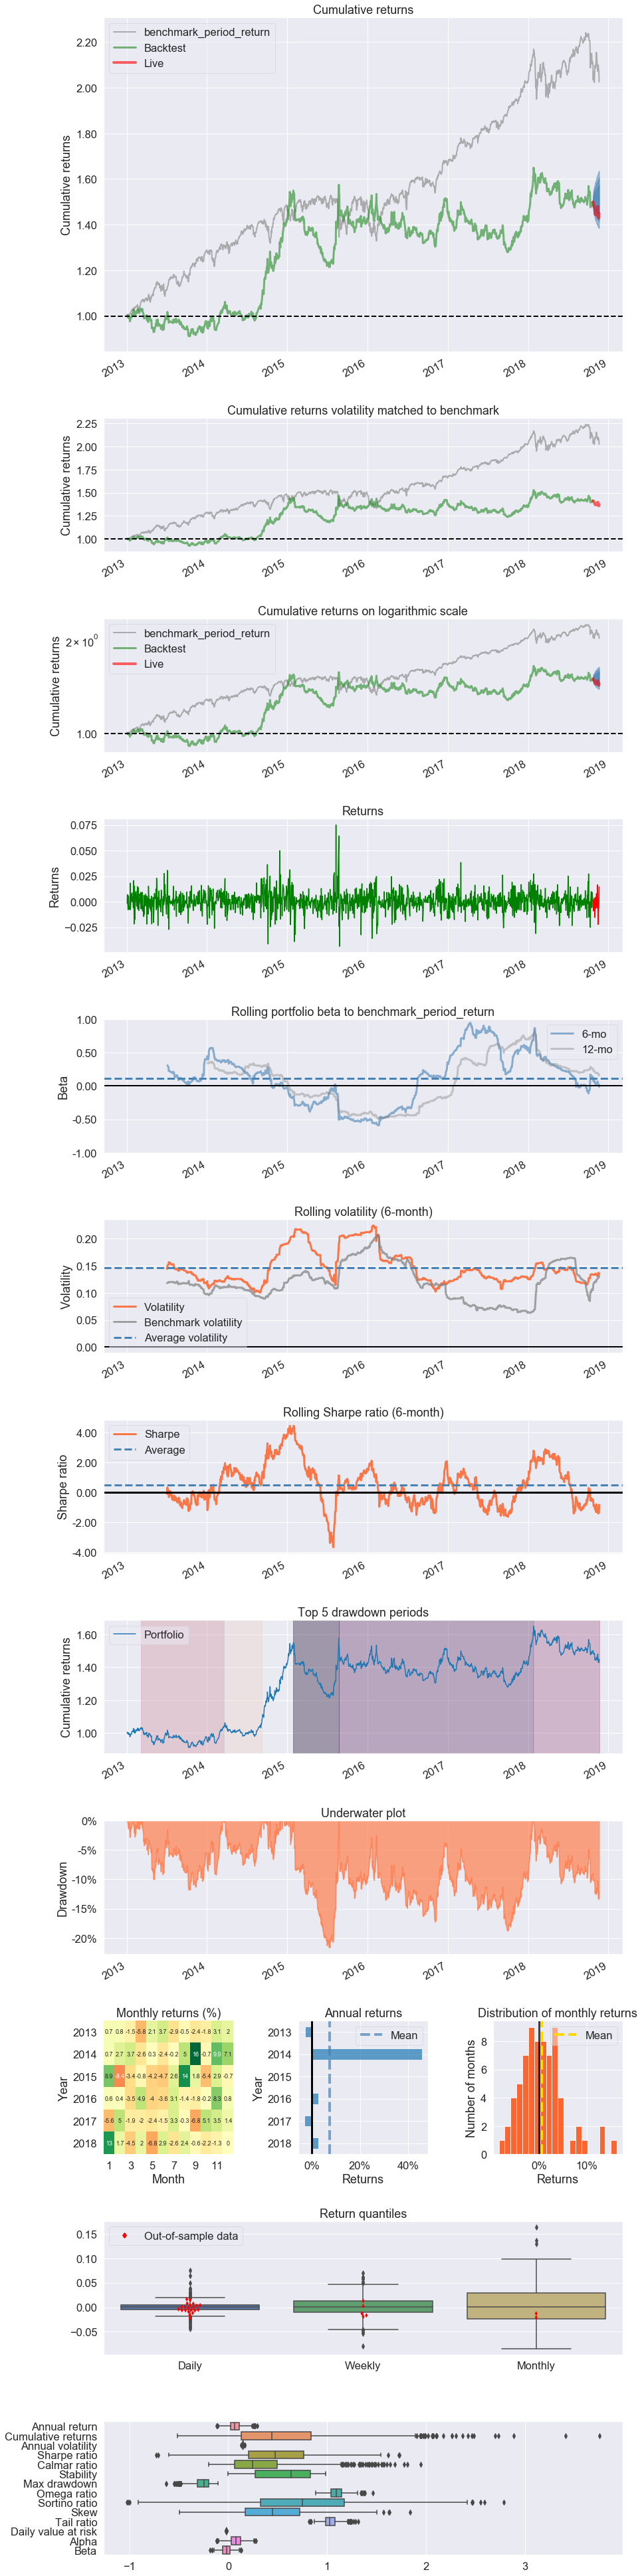

Stress Events,mean,min,max
Apr14,-0.15%,-1.84%,0.83%
Oct14,-0.02%,-4.13%,3.63%
Fall2015,0.20%,-4.36%,6.43%
New Normal,0.03%,-4.36%,7.50%


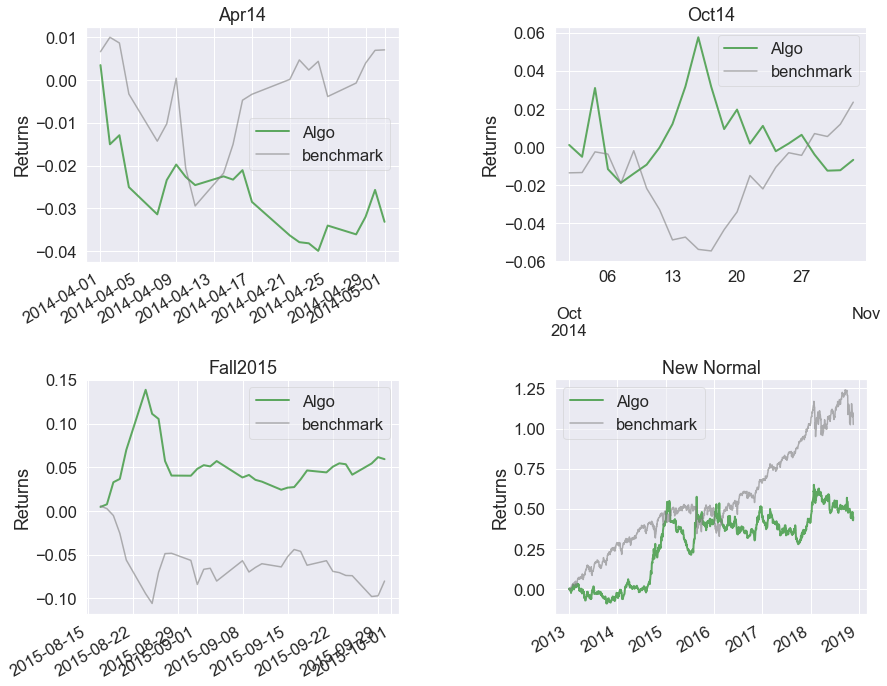

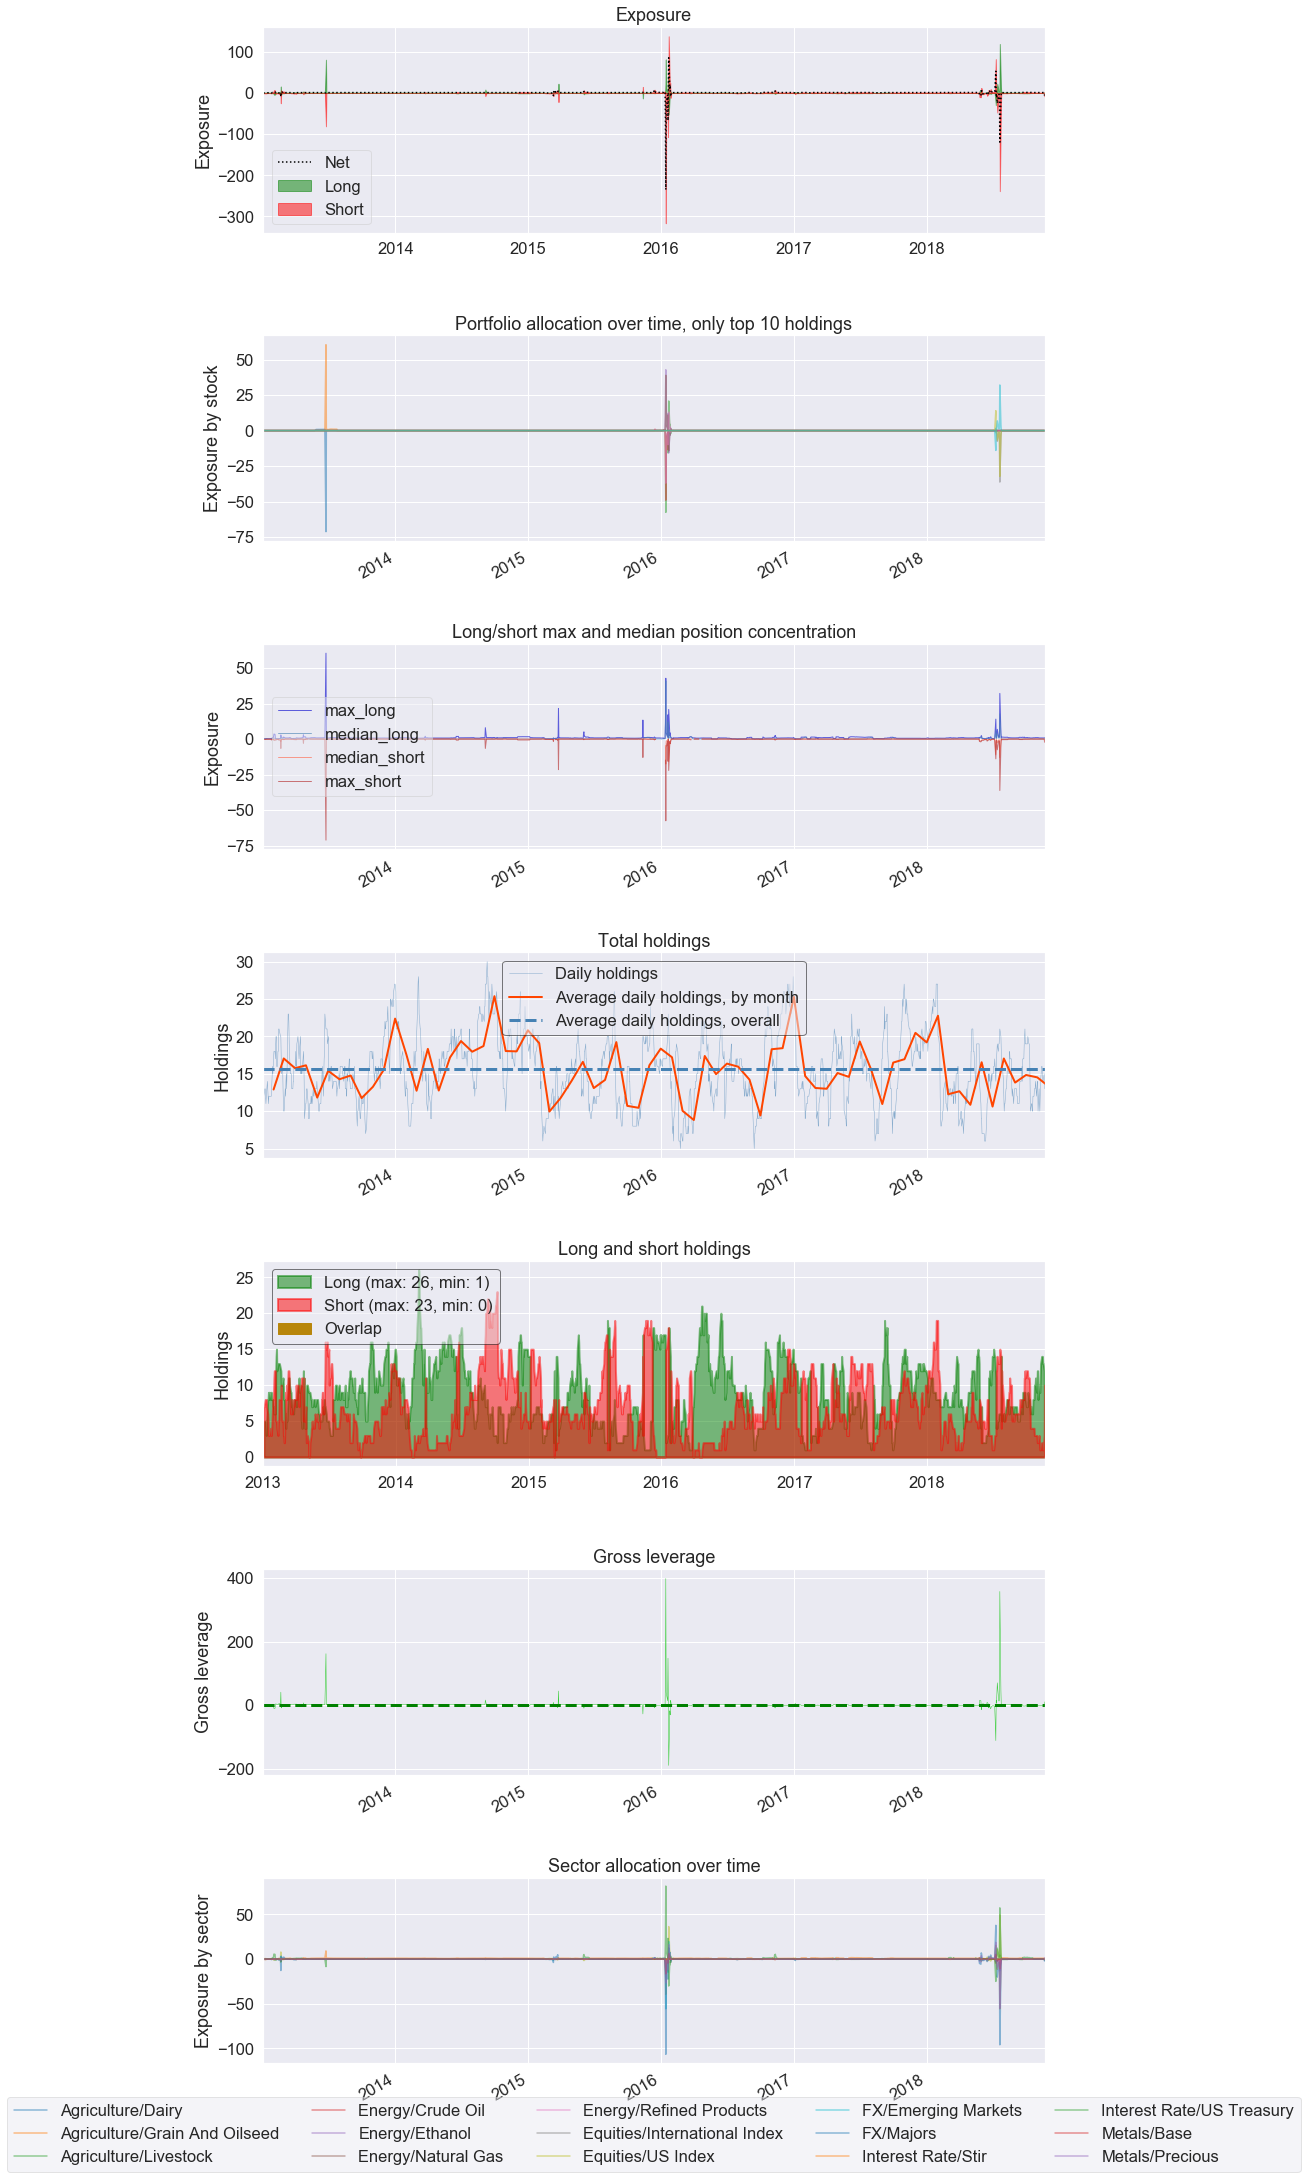

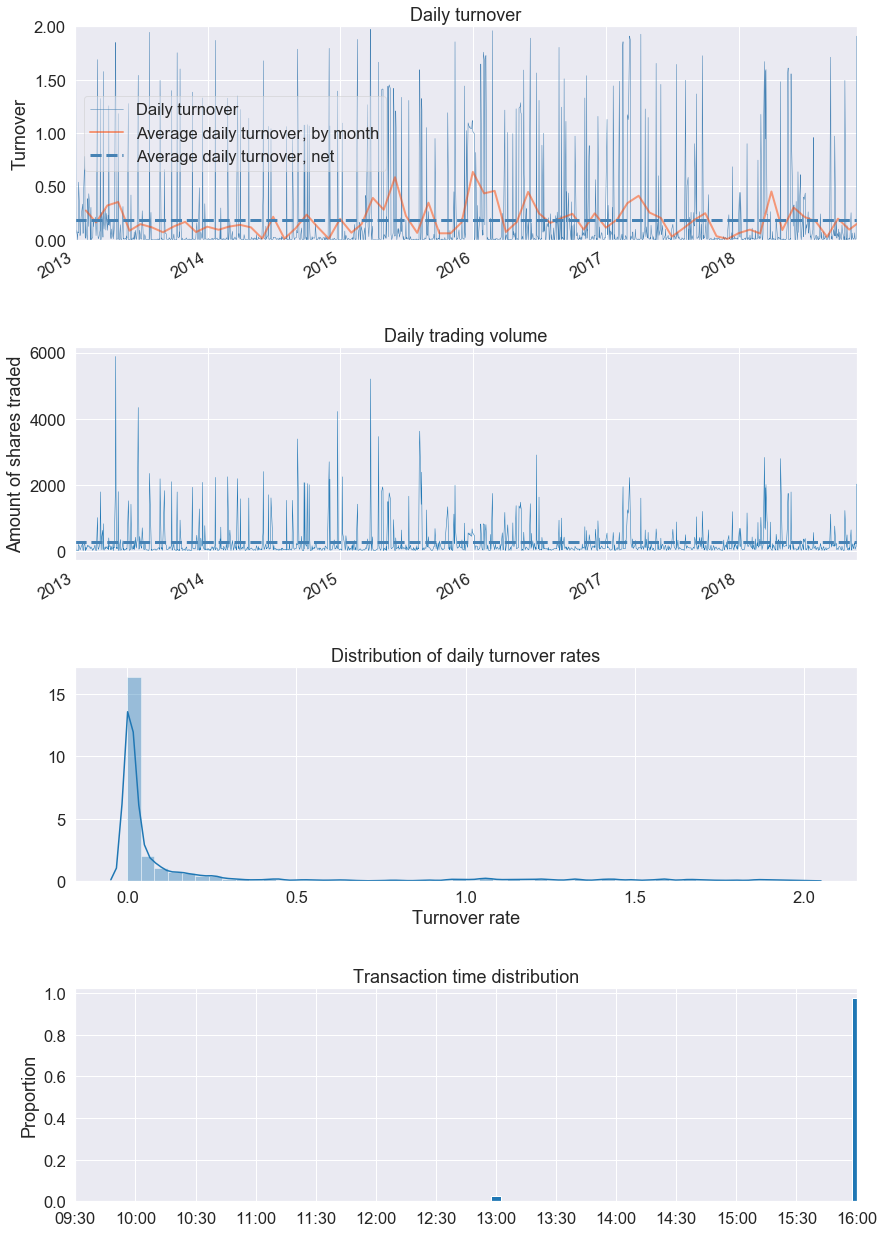

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,1752.00,898.00,854.00
Percent profitable,0.41,0.44,0.38
Winning round_trips,720.00,392.00,328.00
Losing round_trips,992.00,490.00,502.00
Even round_trips,40.00,16.00,24.00


PnL stats,All trades,Short trades,Long trades
Total profit,$4493599.75,$4789703.33,$-296103.58
Gross profit,$44286182.42,$25446631.79,$18839550.64
Gross loss,$-39792582.67,$-20656928.45,$-19135654.22
Profit factor,$1.11,$1.23,$0.98
Avg. trade net profit,$2564.84,$5333.75,$-346.73
Avg. winning trade,$61508.59,$64914.88,$57437.65
Avg. losing trade,$-40113.49,$-42157.00,$-38118.83
Ratio Avg. Win:Avg. Loss,$1.53,$1.54,$1.51
Largest winning trade,$790500.00,$790500.00,$464800.00
Largest losing trade,$-542500.00,$-542500.00,$-271250.00


Duration stats,All trades,Short trades,Long trades
Avg duration,19 days 03:29:37.401255,18 days 14:31:00.141425,19 days 17:08:21.639344
Median duration,14 days 00:00:00,14 days 00:00:00,15 days 00:00:00
Longest duration,144 days 01:00:00,123 days 01:00:00,144 days 01:00:00
Shortest duration,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.10%,0.17%,0.02%
Avg returns winning,0.51%,0.84%,0.16%
Avg returns losing,-0.27%,-0.42%,-0.11%
Median returns all round_trips,-0.00%,-0.00%,-0.00%
Median returns winning,0.02%,0.02%,0.01%
Median returns losing,-0.01%,-0.02%,-0.01%
Largest winning trade,175.46%,175.46%,4.80%
Largest losing trade,-69.28%,-69.28%,-5.37%


Profitability (PnL / PnL total) per name,
symbol,
RUQ15,36.95%
FFJ17,15.80%
RUZ14,12.34%
EDH18,10.48%
YMZ17,10.34%
ECH15,9.71%
BZZ14,9.42%
SMN16,9.21%
MPZ14,8.16%


Profitability (PnL / PnL total) per name,
symbol,
FX/Emerging Markets,53.17%
Energy/Crude Oil,29.91%
Interest Rate/Stir,27.15%
Equities/US Index,21.06%
Energy/Refined Products,17.17%
Agriculture/Dairy,10.42%
Agriculture/Livestock,3.88%
Energy/Ethanol,3.79%
Metals/Base,1.62%


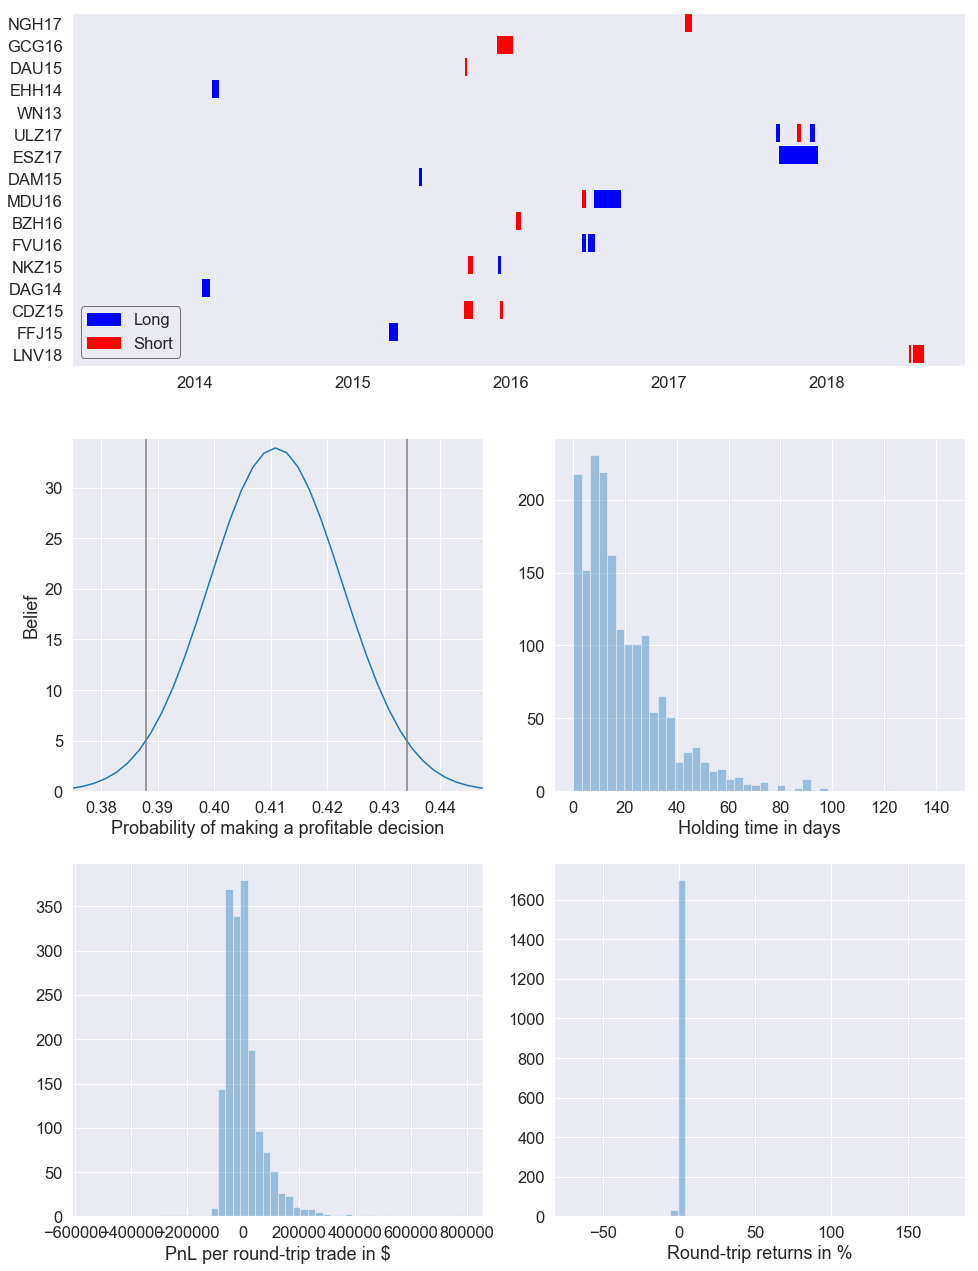

In [8]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions_mod,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                          sector_mappings=sector_map, hide_positions=True)

# PnL by root symbol in dollars and % of total PnL

In [9]:
from pyfolio.round_trips import extract_round_trips, add_closing_transactions
trips = add_closing_transactions(positions, transactions_mod)
trips['value'] = -trips.amount * trips.price
trips['root_symbol'] = trips['symbol'].apply(lambda x: x.root_symbol)
trips = trips.groupby(by='root_symbol').sum().sort_values(by='value', ascending=False)
trips['percent'] = round(trips.value.divide(abs(trips.value.sum())) * 100, 1)
del trips['amount']
del trips['price']
trips

,value,percent
root_symbol,,
RU,2427280.000,54.0
BZ,966610.000,21.5
FF,933420.501,20.8
YM,667015.000,14.8
EC,659375.000,14.7
SM,607710.000,13.5
HO,527268.000,11.7
DA,468220.000,10.4
CL,372710.000,8.3


# Visualization of trades for given root symbol

In [10]:
root = 'CL'

In [11]:
import os
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)
future = bundle_data.asset_finder.lookup_future_symbol
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window

In [12]:
def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

In [13]:
h = his(root)
h.columns=[root]

In [14]:
transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

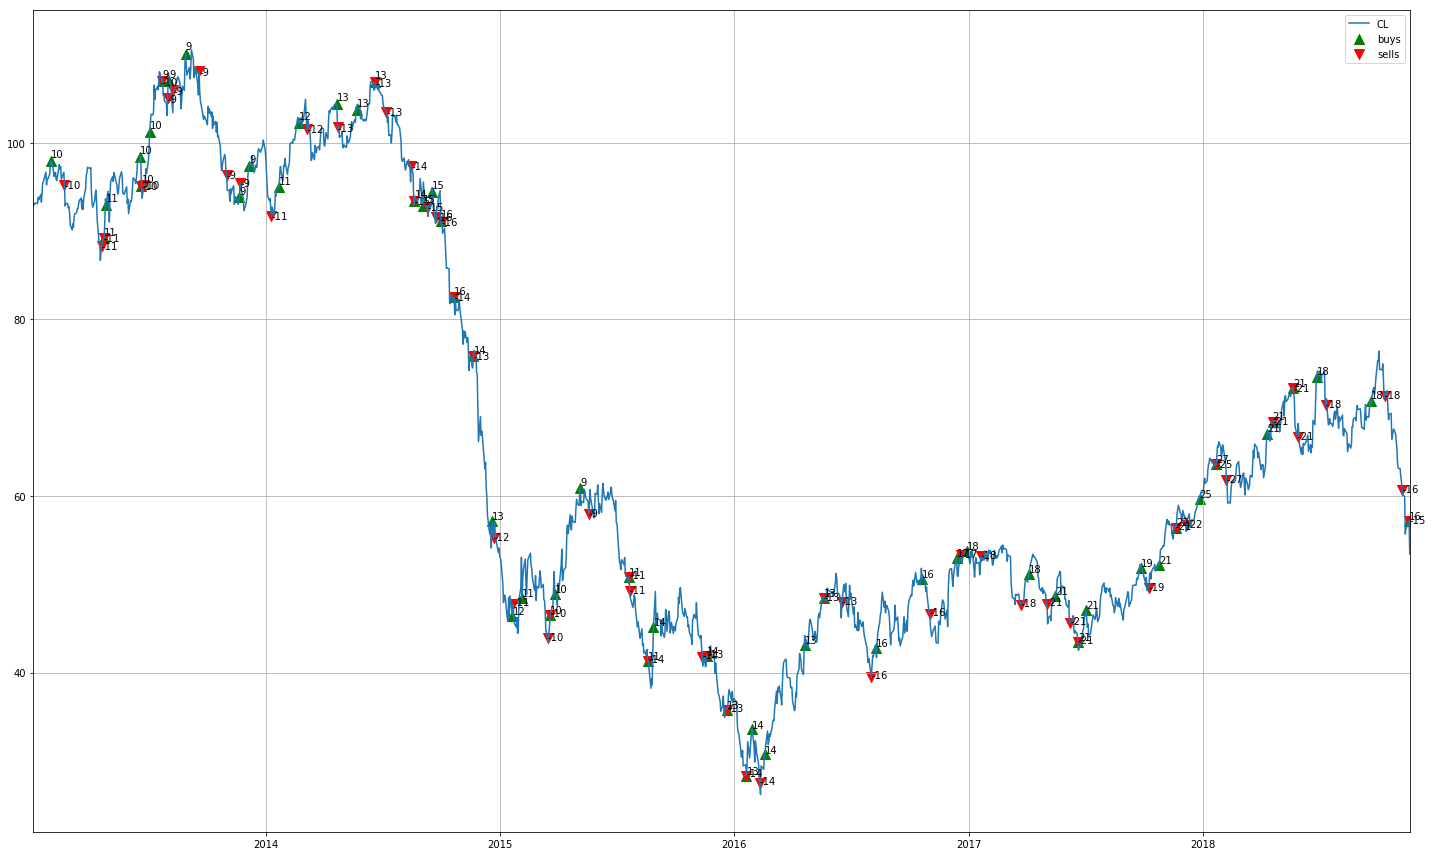

In [16]:
plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

In [17]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)


In [18]:
chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart['slow_ma'] = chart[root].rolling(100).mean()
chart['fast_ma'] = chart[root].rolling(50).mean()
chart = chart[['long', 'short', 'flat', 'slow_ma', 'fast_ma']].applymap(lambda x: x if x != 0 else np.nan)

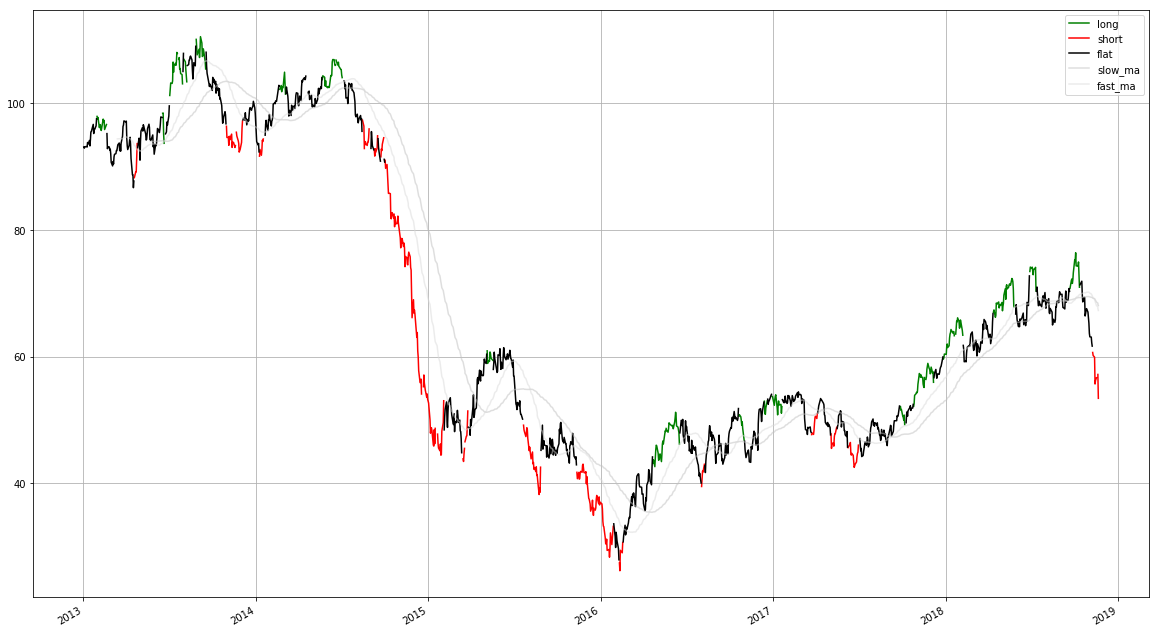

In [19]:
chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
chart['slow_ma'].plot(legend=True, color='.75', alpha=0.5)
chart['fast_ma'].plot(legend=True, color='.85', alpha=0.5)
plt.grid();

In [20]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [21]:
plotly.offline.init_notebook_mode(connected=True)

In [22]:
full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [23]:
exclude_rolls = True
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [24]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none',
                       )

In [25]:
params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

In [26]:
layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

In [27]:
py.iplot(fig, filename='candlestick_chart')

In [28]:
transactions[transactions['root_symbol']==root]

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2013-01-30 21:00:00+00:00,10,None,2013-01-30 21:00:00+00:00,a34596d876a14eea99016e23aeb35ade,97.32,Future(9444 [CLH13]),Future(9444 [CLH13]),-973200.0,CL
2013-02-20 21:00:00+00:00,-10,None,2013-02-20 21:00:00+00:00,None,94.46,Future(9444 [CLH13]),Future(9444 [CLH13]),944600.0,CL
2013-04-19 20:00:00+00:00,-11,None,2013-04-19 20:00:00+00:00,a446cf85451f4b4eb19ec46e77836e8c,88.37,Future(9522 [CLK13]),Future(9522 [CLK13]),972070.0,CL
2013-04-22 20:00:00+00:00,-11,None,2013-04-22 20:00:00+00:00,e97a89565ec94858b42d428e95ad7809,88.20,Future(9553 [CLM13]),Future(9553 [CLM13]),970200.0,CL
2013-04-22 20:00:00+00:00,11,None,2013-04-22 20:00:00+00:00,3473e88304d644fd851a9e222357cbe3,87.96,Future(9522 [CLK13]),Future(9522 [CLK13]),-967560.0,CL
2013-04-26 20:00:00+00:00,11,None,2013-04-26 20:00:00+00:00,6ea830b3cbe8404195868a48946d6302,93.24,Future(9553 [CLM13]),Future(9553 [CLM13]),-1025640.0,CL
2013-06-18 20:00:00+00:00,10,None,2013-06-18 20:00:00+00:00,1cc9f816f7c64c0992c4c79da0c791ce,97.93,Future(9589 [CLN13]),Future(9589 [CLN13]),-979300.0,CL
2013-06-20 20:00:00+00:00,10,None,2013-06-20 20:00:00+00:00,8641f1f0e3e34074869ba1db03004ec9,98.20,Future(9632 [CLQ13]),Future(9632 [CLQ13]),-982000.0,CL
2013-06-20 20:00:00+00:00,-10,None,2013-06-20 20:00:00+00:00,dda85001d2794d80b51fddbac649ff61,98.02,Future(9589 [CLN13]),Future(9589 [CLN13]),980200.0,CL
2013-06-24 20:00:00+00:00,-10,None,2013-06-24 20:00:00+00:00,5b2d578fff5947ab98e0fa65107f75b0,93.85,Future(9632 [CLQ13]),Future(9632 [CLQ13]),938500.0,CL
